In [2]:
import pytc
import plotly.plotly as py
import ipywidgets as widgets

from IPython.display import display, clear_output
from IPython.html.widgets import interactive
from plotly.widgets import GraphWidget
import seaborn as sns

In [4]:
class Sliders():
    
    def __init__(self):
        pass
        
    def linked(self):
        pass
    
    def unlinked(self):
        pass
    
    def fixed(self):
        pass
    
    def gen_sliders(self):
        pass
    
class LocalSliders(Sliders):
    
    def __init__(self, parameters, fitter, exp, global_param = None):
        
        self._fitter = fitter
        self._exp = exp
        self._parameters = parameters
        self._global_param = global_param
        self._global_link = widgets.Dropdown()
        self._fixed_check = widgets.Checkbox(value = False)
        self._slider = widgets.FloatSlider()
        self._constants = {}
        self._sliders = {}
        
        #display(sliders)
        
    def linked(self):
        
        self._sliders = {"link": self._global_link, 
                         "fixed": self._fixed_check}
    
    
    def unlinked(self):
        
        self._sliders = {"slider": self._slider, 
                         "link": self._global_link, 
                         "fixed": self._fixed_check}
    
    def fixed(self):
        
        fixed_int = widgets.FloatText()
        
        self._sliders = {"link": self._global_link, 
                         "fixed": self._fixed_check, 
                         "int": fixed_int}
    
    def create_global(self, global_var):
        
        new_global = GlobalExp()
        param = new_global.parameters()
        
        self._constants['{}'.format(param["name"])] = self._fitter.link_to_global(self._exp, self._parameters["name"],
                                                                                  param["name"])
    
    def pop_dict(self):
        
        #global_param = 'X'
        
        #self._constants = {'unlink': self._fitter.unlink_from_global(self._exp, self._parameters["name"], global_param),
        #                   'create new': self.create_global('Q')}
        self._constants = ['unlink', 'link']
    
    def slider_logic(self, **kwargs):
        
        #self._sliders = []
        
        self.pop_dict()
        self._global_link.options = self._constants
        
        try:
            if kwargs['fixed']:
                self.fixed()
                print(kwargs['int'])
            elif not kwargs['fixed']:
                self.unlinked()
                print(kwargs['fixed'])
            elif kwargs['link'] == 'unlink':
                self.unlinked()
                print(kwargs['link'])
            else:
                self.linked()
                print(kwargs['link'])
        except:
            self.unlinked()
            
        #if fixed:
        #    self.fixed()
        #elif linked == 'unlink':
        #    self.unlinked()
        #else:
        #    self.linked()
    
    def gen_sliders(self):
        
        slider_box = widgets.interactive(self.slider_logic, **self._sliders)
        
        #display(slider_box)
        return self._sliders
    
#### update button if not wanting to use interactive?
    
class GlobalSliders(Sliders):
    
    pass

In [5]:
class ParamCollect():
    def __init__(self, gui, container, fitter):
        
        self._gui = gui
        self._exp_id = ''
        self._exp_val = ''
        self._widgets = []
        self._fitter = fitter
        self._container = container
        self._parameters = {}
        self._models = {"blank" : pytc.models.Blank,
          "single site" : pytc.models.SingleSite,  
          "single site competitor" : pytc.models.SingleSiteCompetitor, 
          "binding polynomial" : pytc.models.BindingPolynomial}
        
    def remove_exp(self, b):
        """
        remove experiment from analysis and close widgets
        """
        try:
            self._gui.remove_experiment(self._exp_id)
        except:
            clear_output()
            print("no experiment linked")
        
        self._widgets[3].close()
        
        for i in self._container:
            if self._exp_id == i[0]._exp_id:
                self._container.remove(i)
    
    def parameters(self):
        """
        get parameters for experiment
        """
        pass
        
    def link_exp(self):
        """
        create a new pytc experiment
        """
        self._exp_val = self._widgets[0].value
        if self._exp_val:
            model = self._widgets[1].value
            self._exp_id = pytc.ITCExperiment(self._exp_val, model)
            self.parameters()
        else:
            clear_output()
            print("no exp data given")
            
    def exp_id(self):
        """
        return experiment id
        """
        
        return self._exp_id
    
    
    def gen_sliders(self):
        """
        generate sliders for each experiment, give option to link to global.
        """
        
        pass
    
    def gen_exp(self):
        """
        generate widgets for experiment.
        """
        pass
    
class Experiments(ParamCollect):
    """
    create experiment object and generate widgets
    """
    def __init__(self, gui, container, fitter):
        super().__init__(gui, container, fitter)
    
    def parameters(self):
        """
        generate local parameters for experiment.
        """
        
        global_param, local_param = self._fitter.param_names
        global_guesses, local_guesses = self._fitter.param_guesses
        global_ranges, local_ranges = self._fitter.param_ranges
        global_fixed, local_fixed = self._fitter.fixed_param 
        
        self._parameters = {"name": local_param, 
                            "value": local_guesses, 
                            "ranges": local_ranges, 
                            "fixed": local_fixed}
        
        return self._parameters
    
    def gen_sliders(self):
        """
        generate sliders for each experiment, give option to link to global.
        """
        
        sliders = LocalSliders(self._parameters, self._fitter, self)
        
        return sliders.gen_sliders()
    
    def gen_exp(self):
        """
        generate widgets for experiment.
        """
        exp_field = widgets.Text(description = "exp: ")
        model_drop = widgets.Dropdown(options = self._models, value = self._models["blank"])

        rm_exp = widgets.Button(description = "remove experiment")
        rm_exp.on_click(self.remove_exp)

        exp_box = widgets.HBox(children = [exp_field, model_drop, rm_exp])
        self._widgets.extend([exp_field, model_drop, rm_exp, exp_box])
        
        return exp_box
    
class GlobalExp(ParamCollect):
    """
    create experiment object and generate widgets
    """
    def __init__(self, gui, container, fitter, v_name):
        
        super().__init__(gui, container, fitter)
        self._v_name = v_name
    
    def parameters(self):
        """
        generate local parameters for experiment.
        """
        
        global_param, local_param = self._fitter.param_names
        global_guesses, local_guesses = self._fitter.param_guesses
        global_ranges, local_ranges = self._fitter.param_ranges
        global_fixed, local_fixed = self._fitter.fixed_param 
        
        self._parameters = {"name": self._v_name, 
                            "value": global_guesses, 
                            "ranges": global_ranges, 
                            "fixed": global_fixed}
        
        return self._parameters
    
    def gen_sliders(self):
        """
        generate sliders for each experiment, give option to link to global.
        """
        
        sliders = GlobalSliders(self._parameters, self._fitter, self)
        
        return sliders.gen_sliders()
    
    def gen_exp(self):
        """
        generate widgets for experiment.
        """
        exp_field = widgets.Text(description = "exp: ")
        model_drop = widgets.Dropdown(options = self._models, value = self._models["blank"])

        rm_exp = widgets.Button(description = "remove experiment")
        rm_exp.on_click(self.remove_exp)

        exp_box = widgets.HBox(children = [exp_field, model_drop, rm_exp])
        self._widgets.extend([exp_field, model_drop, rm_exp, exp_box])
        
        return exp_box

In [6]:
%matplotlib inline

class Interface:
    
    def __init__(self,fitter):
        """
        """
        
        self._global_sliders = {}
        self._local_sliders = []
        self._fitter = fitter
        self._experiments = []
        
    def view_exp(self):
        
        return self._experiments
    
    def add_experiment(self,expt):
        
        self._fitter.add_experiment(expt)
        self._experiments.append(expt)
        
    def remove_experiment(self, expt):
        
        self._fitter.remove_experiment(expt)
        self._experiments.remove(expt)
            
    def reset_sliders(self):
        
        for i in self._local_sliders:
            for slider in i:
                i[slider].close()
            i.clear()
    
    def build_interface(self):
        """
        """

        global_param, local_param = self._fitter.param_names
        global_guesses, local_guesses = self._fitter.param_guesses
        global_ranges, local_ranges = self._fitter.param_ranges
        global_fixed, local_fixed = self._fitter.fixed_param 
        
        #self.reset_sliders()
        all_widgets = {}
        
        for p in global_param:
        
            g_min = global_ranges[p][0]
            g_max = global_ranges[p][1]
            g_val = global_guesses[p]
            
            self._global_sliders[p] = widgets.FloatSlider(min=g_min,max=g_max,value=g_val)
            
            all_widgets["{}".format(p)] = self._global_sliders[p]
    
        for i in range(len(self._experiments)):            
            
            self._local_sliders.append({})
        
            for p in local_param[i]:
            
                g_min = local_ranges[i][p][0]
                g_max = local_ranges[i][p][1]
                g_val = local_guesses[i][p]
                
                self._local_sliders[-1][p] = widgets.FloatSlider(min=g_min,max=g_max,value=g_val)
        
                all_widgets["{},{}".format(p,i)] = self._local_sliders[-1][p]

        w = widgets.interactive(self._update,**all_widgets)
                        
        display(w)

    def _update(self,**kwargs):
        """
        """
        
        for k in kwargs.keys():
            if len(k.split(",")) == 1:
                self._fitter.update_guess(k,kwargs[k])
            else:
                
                param_name = k.split(",")[0]
                expt = self._experiments[int(k.split(",")[1])]
                self._fitter.update_guess(param_name,kwargs[k],expt)
       
        self._fitter.fit()
        self._fitter.plot()
        
        
    def get_param(self):
        
        print(self._fitter.fit_param)

({}, [{'dilution_intercept': -3.9609053177466906, 'dilution_heat': 28644.808742528861}])


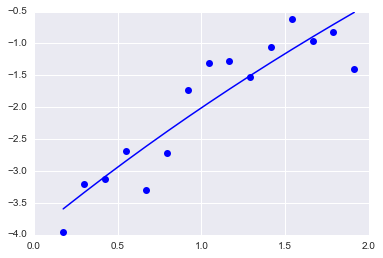

In [7]:
exp_w = []
f = pytc.GlobalFit()
gui = Interface(f)

def rm_last(b):

    if exp_w:
        last_exp = exp_w[-1]
        last_exp[1].close()
        try:
            gui.remove_experiment(last_exp[0].exp_id())
        except:
            pass

        exp_w.remove(last_exp)

def gen_exp(b):
    
    gui.reset_sliders()
    clear_output()
    
    for i in exp_w:
        if len(exp_w) > len(gui.view_exp()):
            try:
                exp = i[0]
                exp.link_exp()

                gui.add_experiment(exp.exp_id())
                
                # generate sliders here, update experiment view, something like...
                
                param = i[0].parameters()
                name = param["name"]
                
                print(name)
                
            except:
                print("no data added.")
        else:
            pass

        #f.link_to_global(exp, "dilution_heat", "global_heat")
        #f.link_to_global(exp, "dilution_intercept", "global_intercept")

    gui.build_interface()
    gui.get_param()

def clear_exp(b):

    for i in exp_w:
        try:
            i[1].close()
            gui.remove_experiment(i[0].exp_id())
        except:
            pass
        
        exp_w.remove(i)
        
    gui.reset_sliders()
    
    clear_output()


def add_field(b):
    
    clear_output()
    gui.reset_sliders()
    exp_object = Experiments(gui, exp_w, f)
    show = exp_object.gen_exp()

    exp_w.append([exp_object, show])

    display(show)
        
    # true false??? each time add_field clicked set true, each time analyze clicked set false.
        
ENTRY_W = '200px'

add_exp_field_b = widgets.Button(description = "Add an Experiment")
add_exp_field_b.layout.width = ENTRY_W
add_exp_field_b.on_click(add_field)

rmv_last_field = widgets.Button(description = "Remove Last Experiment")
rmv_last_field.layout.width = ENTRY_W
rmv_last_field.on_click(rm_last)

exp_object = Experiments(gui, exp_w, f)
show = exp_object.gen_exp()

exp_w.append([exp_object, show])

analyze_widget = widgets.Button(description = "Analyze")
analyze_widget.on_click(gen_exp)

clear_widget = widgets.Button(description = "Clear", value = False)
clear_widget.on_click(clear_exp)

experiments_layout = widgets.Layout(display = "flex", 
                      flex_flow = "row", 
                      align_items = "stretch")

experiments = widgets.Box(children = [add_exp_field_b, rmv_last_field], 
                                      layout = experiments_layout)
parent = widgets.Box(children = [analyze_widget, clear_widget, experiments, show])

display(parent)

### next to sliders try dropdown to link to any of the local
### widget sliders class, make instance in experiment class
### global and local sliders class
### param collection class, experimental child and global child
### put in fit parameters

test-data/real-blank-match.DH

test-data/blank.DH

In [111]:
blah = {'hey': 'widget', 'hello': 'widget2'}

In [34]:
gui.view_exp()

In [94]:
len(exp_w), len(gui.view_exp())

(1, 3)

In [70]:
exp_w

[[<__main__.Experiments at 0x112f77358>,

In [8]:
blah = exp_w[0][0]

In [29]:
blah.gen_sliders()

In [9]:
sliders = LocalSliders(blah.parameters(), f, blah)

In [28]:
s = sliders.gen_sliders()

In [21]:
sliders.linked()

In [27]:
sliders.pop_dict()

In [29]:
s

{'fixed': <ipywidgets.widgets.widget_bool.Checkbox at 0x110e8ceb8>,
 'link': <ipywidgets.widgets.widget_selection.Dropdown at 0x1109bd128>}

In [166]:
options = {'unlink': 1, 'link': 2}

In [36]:
s['link']

In [201]:
s['int']

In [49]:
def logic(**kwargs):
    
    sliders.pop_dict()
    
    if kwargs['fixed']:
        sliders.fixed()
        #print(kwargs['int'])
    elif kwargs['link'] == 'unlink':
        sliders.unlinked()
    elif kwargs['link'] == 'link':
        sliders.linked()
    else:
        sliders.unlinked()
    
    sliders.gen_sliders()
    
def update_s():

In [50]:
slider_box = widgets.interactive(logic, **sliders.gen_sliders())

In [52]:
update = widgets.Button(description = 'Update')
update.on_click(update_s)

In [53]:
display(update)